<a href="https://colab.research.google.com/github/August65/prophet-yfinance-1/blob/main/prophetModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 685 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


[*********************100%***********************]  1 of 1 completed


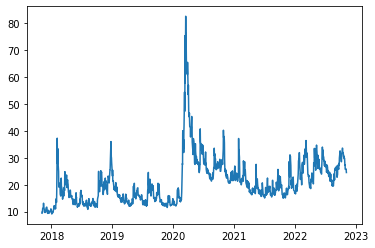

In [ ]:
# import
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
import yfinance as yf
ticker="^VIX"
period1="5y"
df1=yf.download(ticker,period=period1,group_by='column',rounding=2)
plt.plot(df1["Close"])
df1.reset_index(inplace=True)
data=df1[["Date","Adj Close"]]
data=data.rename(columns={"Date": "ds", "Adj Close": "y"})


In [ ]:
data

,ds,y
0,2017-11-06,9.40
1,2017-11-07,9.89
2,2017-11-08,9.78
3,2017-11-09,10.50
4,2017-11-10,11.29
...,...,...
1254,2022-10-31,25.88
1255,2022-11-01,25.81
1256,2022-11-02,25.86
1257,2022-11-03,25.30


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbh45v8g1/d7l0e_18.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbh45v8g1/_hcuea4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13476', 'data', 'file=/tmp/tmpbh45v8g1/d7l0e_18.json', 'init=/tmp/tmpbh45v8g1/_hcuea4c.json', 'output', 'file=/tmp/tmpbh45v8g1/prophet_model0niqd0k3/prophet_model-20221105092352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:23:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:23:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


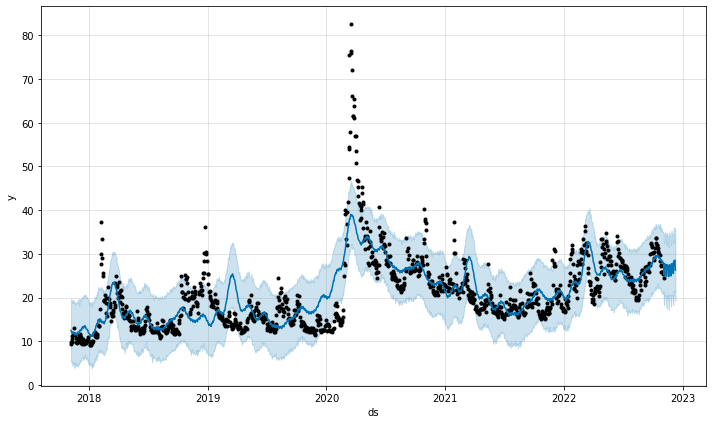

In [ ]:
m = Prophet()
m.fit(data)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=36)
a=m.predict(future)
fig1=m.plot(a)

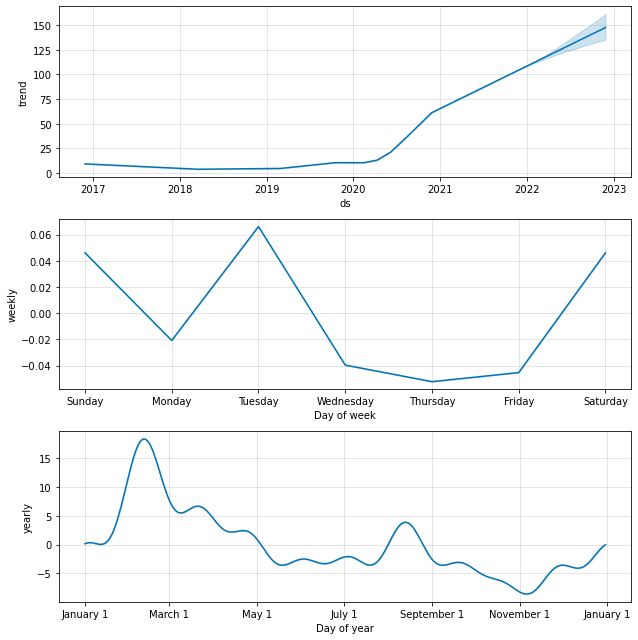

In [ ]:
fig2=m.plot_components(a)

In [ ]:
a.tail(n=10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1613,2022-11-17,146.625492,121.843989,159.050246,134.624999,159.764402,-6.623924,-6.623924,-6.623924,-0.052327,-0.052327,-0.052327,-6.571597,-6.571597,-6.571597,0.0,0.0,0.0,140.001568
1614,2022-11-18,146.743882,122.898351,158.083216,134.704715,159.935846,-6.293251,-6.293251,-6.293251,-0.045403,-0.045403,-0.045403,-6.247848,-6.247848,-6.247848,0.0,0.0,0.0,140.450631
1615,2022-11-19,146.862273,122.938219,159.290220,134.763429,160.107289,-5.875331,-5.875331,-5.875331,0.046081,0.046081,0.046081,-5.921412,-5.921412,-5.921412,0.0,0.0,0.0,140.986941
1616,2022-11-20,146.980663,122.226273,160.128323,134.833409,160.278733,-5.552194,-5.552194,-5.552194,0.046081,0.046081,0.046081,-5.598274,-5.598274,-5.598274,0.0,0.0,0.0,141.428469
1617,2022-11-21,147.099053,124.384148,158.562801,134.906015,160.451183,-5.305178,-5.305178,-5.305178,-0.020865,-0.020865,-0.020865,-5.284312,-5.284312,-5.284312,0.0,0.0,0.0,141.793875
1618,2022-11-22,147.217443,124.600065,159.951622,134.963637,160.622436,-4.919019,-4.919019,-4.919019,0.066111,0.066111,0.066111,-4.985130,-4.985130,-4.985130,0.0,0.0,0.0,142.298424
1619,2022-11-23,147.335833,124.755160,160.856343,134.997798,160.791332,-4.745572,-4.745572,-4.745572,-0.039676,-0.039676,-0.039676,-4.705897,-4.705897,-4.705897,0.0,0.0,0.0,142.590261
1620,2022-11-24,147.454224,124.428227,161.526198,135.036762,160.960228,-4.503527,-4.503527,-4.503527,-0.052327,-0.052327,-0.052327,-4.451199,-4.451199,-4.451199,0.0,0.0,0.0,142.950697
1621,2022-11-25,147.572614,125.822655,161.796152,135.089046,161.129124,-4.270308,-4.270308,-4.270308,-0.045403,-0.045403,-0.045403,-4.224904,-4.224904,-4.224904,0.0,0.0,0.0,143.302306
1622,2022-11-26,147.691004,124.876022,162.437704,135.141457,161.298020,-3.983964,-3.983964,-3.983964,0.046081,0.046081,0.046081,-4.030045,-4.030045,-4.030045,0.0,0.0,0.0,143.707040


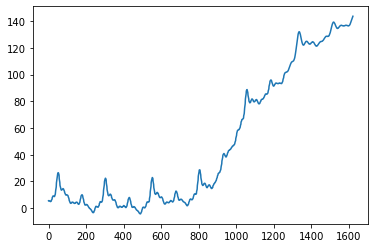

In [ ]:

plt.plot(a['yhat'])